In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math 
from scipy import stats
import random
%matplotlib inline

In [173]:
df=pd.read_csv("Sales Records.csv")

In [174]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Central America and the Caribbean,Dominican Republic,Baby Food,Offline,C,2/12/2015,350891578,3/15/2015,5470,255.28,159.42,1396381.60,872027.40,524354.20
49996,Central America and the Caribbean,Cuba,Office Supplies,Online,M,3/28/2013,748260629,5/3/2013,5803,651.21,524.96,3778971.63,3046342.88,732628.75
49997,Asia,Vietnam,Personal Care,Offline,L,11/11/2016,322932231,12/18/2016,1678,81.73,56.67,137142.94,95092.26,42050.68
49998,Sub-Saharan Africa,Sierra Leone,Clothes,Online,M,8/28/2010,492142713,9/21/2010,4820,109.28,35.84,526729.60,172748.80,353980.80


In [175]:
df.shape

(50000, 14)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          50000 non-null  object 
 1   Country         50000 non-null  object 
 2   Item Type       50000 non-null  object 
 3   Sales Channel   50000 non-null  object 
 4   Order Priority  50000 non-null  object 
 5   Order Date      50000 non-null  object 
 6   Order ID        50000 non-null  int64  
 7   Ship Date       50000 non-null  object 
 8   Units Sold      50000 non-null  int64  
 9   Unit Price      50000 non-null  float64
 10  Unit Cost       50000 non-null  float64
 11  Total Revenue   50000 non-null  float64
 12  Total Cost      50000 non-null  float64
 13  Total Profit    50000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.3+ MB


In [136]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [140]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [141]:
df = df.drop(['Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost'], axis=1)

In [142]:
df

,Region,Country,Item Type,Sales Channel,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,406257.50,231292.25,174965.25
...,...,...,...,...,...,...,...
49995,Central America and the Caribbean,Dominican Republic,Baby Food,Offline,1396381.60,872027.40,524354.20
49996,Central America and the Caribbean,Cuba,Office Supplies,Online,3778971.63,3046342.88,732628.75
49997,Asia,Vietnam,Personal Care,Offline,137142.94,95092.26,42050.68
49998,Sub-Saharan Africa,Sierra Leone,Clothes,Online,526729.60,172748.80,353980.80


In [143]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Total Revenue',
       'Total Cost', 'Total Profit'],
      dtype='object')

In [144]:
df.Country.value_counts()

Trinidad and Tobago    321
Guinea                 318
Cape Verde             315
Maldives               311
Finland                310
                      ... 
Iran                   238
Yemen                  238
Armenia                237
Monaco                 236
Malawi                 233
Name: Country, Length: 185, dtype: int64

In [145]:
df.Country.value_counts().sort_values()

Malawi                 233
Monaco                 236
Armenia                237
Yemen                  238
Iran                   238
                      ... 
Finland                310
Maldives               311
Cape Verde             315
Guinea                 318
Trinidad and Tobago    321
Name: Country, Length: 185, dtype: int64

In [176]:
a=df.groupby([df.Country, df['Item Type']]).sum()

In [147]:
a

Total Revenue   Total Cost  Total Profit
Country     Item Type                                                
Afghanistan Baby Food          33453678.16  20891512.74   12562165.42
            Beverages           4922035.95   3297608.49    1624427.46
            Cereal             17378358.80   9893921.24    7484437.56
            Clothes            13851349.28   4542755.84    9308593.44
            Cosmetics          58841873.60  35441058.04   23400815.56
...                                    ...          ...           ...
Zimbabwe    Meat               46074606.90  39827794.90    6246812.00
            Office Supplies    64967314.44  52372109.44   12595205.00
            Personal Care       9337815.96   6474660.84    2863155.12
            Snacks             17396103.54  11109426.72    6286676.82
            Vegetables         16646953.30   9825441.15    6821512.15

[2220 rows x 3 columns]

In [198]:
df.groupby(['Country', 'Item Type'])['Item Type'].count().sort_values()

Country                           Item Type    
Tonga                             Personal Care     8
Monaco                            Household        10
Turkey                            Personal Care    10
Monaco                            Vegetables       10
Slovakia                          Vegetables       10
                                                   ..
Montenegro                        Fruits           36
Trinidad and Tobago               Personal Care    37
Democratic Republic of the Congo  Household        37
Kiribati                          Cosmetics        38
Algeria                           Fruits           39
Name: Item Type, Length: 2220, dtype: int64

In [177]:
df.Country.unique()

array(['Namibia', 'Iceland', 'Russia', 'Moldova ', 'Malta', 'Indonesia',
       'Djibouti', 'Greece', 'Cameroon', 'Nigeria', 'Senegal',
       'Afghanistan', 'India', 'Lebanon', 'Turkey', 'Iraq', 'Rwanda',
       'Ukraine', 'Finland', 'South Sudan', 'Antigua and Barbuda ',
       'Kuwait', 'United Kingdom', 'Saint Kitts and Nevis ',
       'Saint Lucia', 'Tunisia ', 'Yemen', 'Guinea', 'Tuvalu',
       'South Korea', 'San Marino', 'Trinidad and Tobago', 'Kosovo',
       'Hungary', 'Botswana', 'Serbia', 'Guatemala',
       'United Arab Emirates', 'Samoa ', 'Bahrain',
       'Saint Vincent and the Grenadines', 'Pakistan', 'Poland',
       'Lithuania', 'Sudan', 'Portugal', 'Fiji', 'Tanzania',
       'Sao Tome and Principe', 'Cape Verde', 'Greenland',
       'Guinea-Bissau', 'Georgia', 'Jamaica', 'Bulgaria', 'Kazakhstan',
       'Grenada', 'Honduras', 'Mongolia', 'Belize',
       'United States of America', 'South Africa', 'Austria',
       'Marshall Islands', 'Sierra Leone', 'Romania', 'Ma

In [201]:
df10 = df[df['Country'] == 'Saudi Arabia']

In [202]:
df10


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
278,Middle East and North Africa,Saudi Arabia,Beverages,Online,L,9/19/2015,478275907,10/17/2015,1324,47.45,31.79,62823.80,42089.96,20733.84
392,Middle East and North Africa,Saudi Arabia,Beverages,Online,C,12/31/2014,758833253,1/27/2015,4477,47.45,31.79,212433.65,142323.83,70109.82
458,Middle East and North Africa,Saudi Arabia,Snacks,Offline,H,3/26/2015,427486455,4/19/2015,1597,152.58,97.44,243670.26,155611.68,88058.58
530,Middle East and North Africa,Saudi Arabia,Snacks,Offline,C,3/13/2017,671853291,4/8/2017,5174,152.58,97.44,789448.92,504154.56,285294.36
545,Middle East and North Africa,Saudi Arabia,Meat,Online,C,4/14/2013,940290057,5/28/2013,1578,421.89,364.69,665742.42,575480.82,90261.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49229,Middle East and North Africa,Saudi Arabia,Clothes,Offline,M,4/11/2011,628462016,4/28/2011,4731,109.28,35.84,517003.68,169559.04,347444.64
49278,Middle East and North Africa,Saudi Arabia,Clothes,Online,L,12/13/2012,117419660,12/26/2012,5941,109.28,35.84,649232.48,212925.44,436307.04
49311,Middle East and North Africa,Saudi Arabia,Cereal,Offline,H,2/26/2012,241998183,4/10/2012,1495,205.70,117.11,307521.50,175079.45,132442.05
49599,Middle East and North Africa,Saudi Arabia,Household,Online,M,2/22/2015,708381545,3/4/2015,4696,668.27,502.54,3138195.92,2359927.84,778268.08


In [203]:
df10 = df10.groupby(df['Item Type']).sum()

In [204]:
df10

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Item Type,,,,,,,
Baby Food,16226485726,156795,6892.56,4304.34,40026627.60,24996258.90,15030368.70
Beverages,9781351841,116470,949.00,635.80,5526501.50,3702581.30,1823920.20
Cereal,17015656623,171982,6993.80,3981.74,35376697.40,20140812.02,15235885.38
Clothes,13708170296,143587,2732.00,896.00,15691187.36,5146158.08,10545029.28
Cosmetics,9363704196,79833,6995.20,4213.28,34902987.60,21022423.89,13880563.71
Fruits,14279598518,129604,251.91,186.84,1209205.32,896859.68,312345.64
Household,11214296785,79016,12028.86,9045.72,52804022.32,39708700.64,13095321.68
Meat,12487847044,115111,9703.47,8387.87,48564179.79,41979830.59,6584349.20
Office Supplies,18257152697,136281,17582.67,14173.92,88747550.01,71542073.76,17205476.25


In [205]:
df10.sort_values("Total Profit")

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Item Type,,,,,,,
Fruits,14279598518,129604,251.91,186.84,1209205.32,896859.68,312345.64
Beverages,9781351841,116470,949.00,635.80,5526501.50,3702581.30,1823920.20
Personal Care,13897040450,105610,1961.52,1360.08,8631505.30,5984918.70,2646586.60
Snacks,12410831321,115592,3356.76,2143.68,17637027.36,11263284.48,6373742.88
Meat,12487847044,115111,9703.47,8387.87,48564179.79,41979830.59,6584349.20
Vegetables,18807893701,138200,4775.86,2818.83,21291092.00,12566526.00,8724566.00
Clothes,13708170296,143587,2732.00,896.00,15691187.36,5146158.08,10545029.28
Household,11214296785,79016,12028.86,9045.72,52804022.32,39708700.64,13095321.68
Cosmetics,9363704196,79833,6995.20,4213.28,34902987.60,21022423.89,13880563.71


<ipython-input-257-c80ac54e2e2f>:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.bar(z, y, color = my_colors)


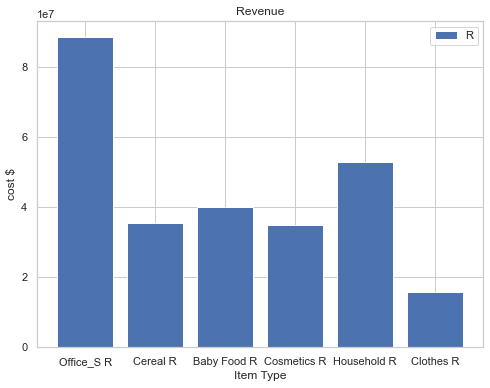

In [257]:
#revenue

z = ('Office_S R', 'Cereal R', 'Baby Food R', 'Cosmetics R','Household R', 'Clothes R')
y = (88747550.01, 35376697.40, 40026627.60, 34902987.60, 52804022.32, 15691187.36)




my_colors = 'bbbbb'

a = fig, ax = plt.subplots(figsize=(8, 6))

ax.set_ylabel('cost $')
ax.set_xlabel('Item Type')
ax.set_title('Revenue')
ax.bar(z, y, color = my_colors)
ax.legend("Revenue")
plt.show()

<ipython-input-261-7f4be949a7e2>:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.bar(z, y, color = my_colors)


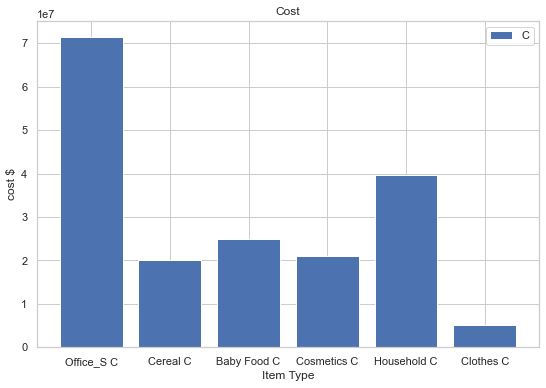

In [261]:
#cost

z = ('Office_S C', 'Cereal C', 'Baby Food C', 'Cosmetics C','Household C', 'Clothes C')
y = (71542073.76, 20140812.02, 24996258.90, 21022423.89, 39708700.64, 5146158.08)




my_colors = 'bbbbb'

a = fig, ax = plt.subplots(figsize=(9, 6))

ax.set_ylabel('cost $')
ax.set_xlabel('Item Type')
ax.set_title('Cost')

ax.bar(z, y, color = my_colors)
ax.legend('Cost')
plt.show()

<ipython-input-283-3849d1518ad5>:20: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.bar(z, y, color = my_colors)


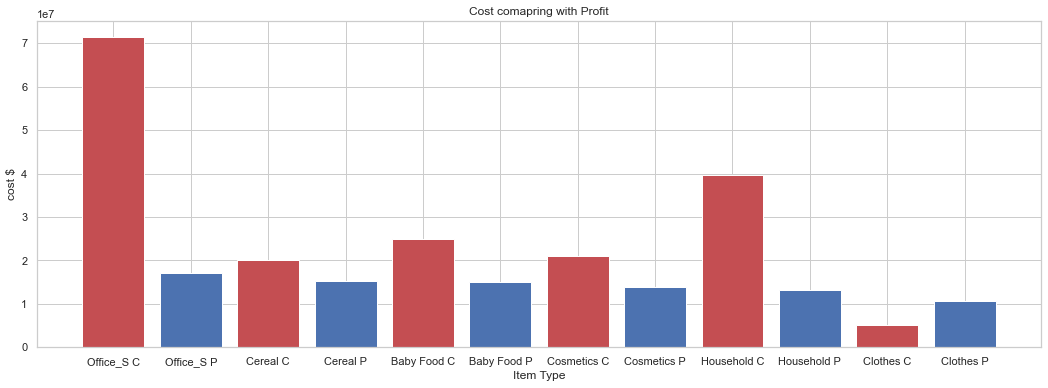

In [283]:
#cost comapring with profit

z = ('Office_S C', 'Office_S P', 'Cereal C', 'Cereal P','Baby Food C','Baby Food P', 'Cosmetics C', 'Cosmetics P','Household C','Household P', 'Clothes C', 'Clothes P')
y = (71542073.76, 17205476.25, 20140812.02, 15235885.38, 24996258.90, 15030368.70, 21022423.89, 13880563.71, 39708700.64, 13095321.68, 5146158.08, 10545029.28)




my_colors = 'rbrbrb'

a = fig, ax = plt.subplots(figsize=(18, 6))

ax.set_ylabel('cost $')
ax.set_xlabel('Item Type')
ax.set_title('Cost comapring with Profit')




ax.bar(z, y, color = my_colors)

plt.show()

<ipython-input-285-9e617d23df35>:20: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.bar(z, y, color = my_colors)


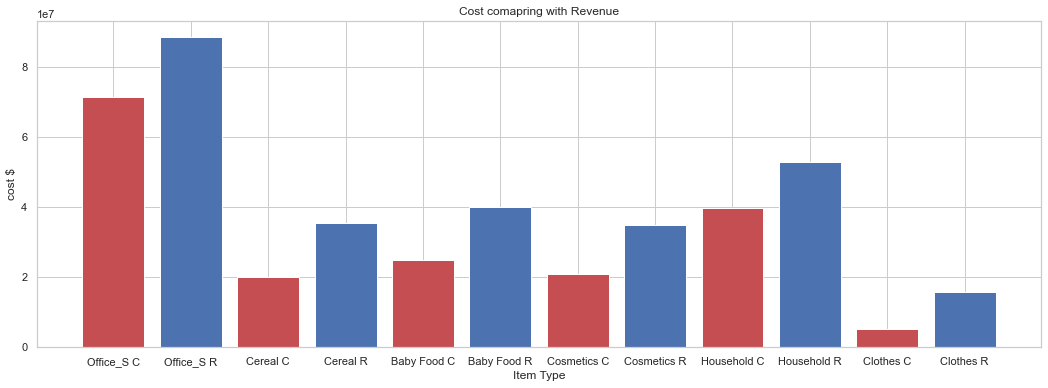

In [285]:
#cost comapring with revenue

z = ('Office_S C', 'Office_S R', 'Cereal C', 'Cereal R','Baby Food C','Baby Food R', 'Cosmetics C', 'Cosmetics R','Household C','Household R', 'Clothes C', 'Clothes R')
y = (71542073.76, 88747550.01, 20140812.02, 35376697.40, 24996258.90, 40026627.60, 21022423.89, 34902987.60, 39708700.64, 52804022.32, 5146158.08, 15691187.36)




my_colors = 'rbrbrb'

a = fig, ax = plt.subplots(figsize=(18, 6))

ax.set_ylabel('cost $')
ax.set_xlabel('Item Type')
ax.set_title('Cost comapring with Revenue')




ax.bar(z, y, color = my_colors)

plt.show()

<ipython-input-287-edcafcace0f3>:20: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.bar(z, y, color = my_colors)


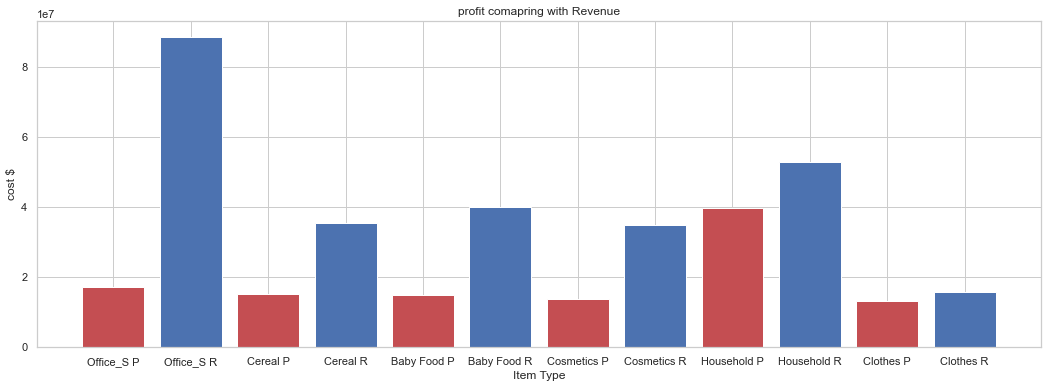

In [287]:
#profit comapring with revenue

z = ('Office_S P', 'Office_S R', 'Cereal P', 'Cereal R','Baby Food P','Baby Food R', 'Cosmetics P', 'Cosmetics R','Household P','Household R', 'Clothes P', 'Clothes R')
y = (17205476.25, 88747550.01, 15235885.38, 35376697.40, 15030368.70, 40026627.60, 13880563.71, 34902987.60, 39708700.64, 52804022.32, 13095321.68, 15691187.36)




my_colors = 'rbrbrb'

a = fig, ax = plt.subplots(figsize=(18, 6))

ax.set_ylabel('cost $')
ax.set_xlabel('Item Type')
ax.set_title('profit comapring with Revenue')




ax.bar(z, y, color = my_colors)

plt.show()